In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 91% 148M/163M [00:00<00:00, 188MB/s]
100% 163M/163M [00:01<00:00, 160MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_623.jpg', 'with_mask_643.jpg', 'with_mask_1409.jpg', 'with_mask_554.jpg', 'with_mask_3647.jpg']
['with_mask_3624.jpg', 'with_mask_1802.jpg', 'with_mask_3719.jpg', 'with_mask_3528.jpg', 'with_mask_969.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1474.jpg', 'without_mask_1553.jpg', 'without_mask_904.jpg', 'without_mask_628.jpg', 'without_mask_539.jpg']
['without_mask_1715.jpg', 'without_mask_3140.jpg', 'without_mask_2318.jpg', 'without_mask_2888.jpg', 'without_mask_68.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


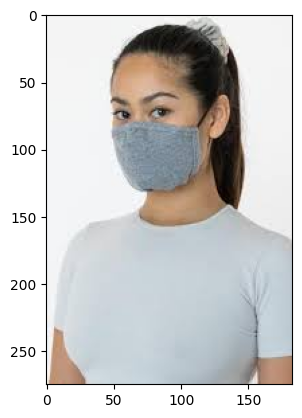

In [18]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_3719.jpg')
imgplot = plt.imshow(img)
plt.show()

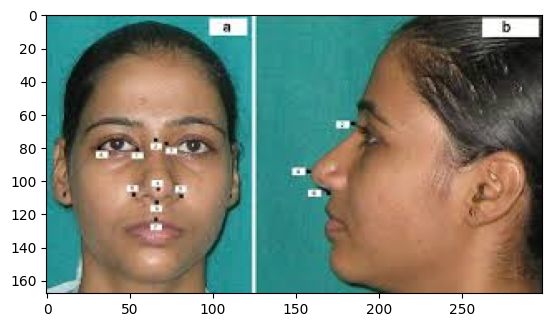

In [19]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1474.jpg')
imgplot = plt.imshow(img)
plt.show()

In [20]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
type(data)

list

In [22]:
len(data)

7553

In [23]:
data[0]

array([[[76, 80, 81],
        [70, 72, 74],
        [70, 71, 72],
        ...,
        [64, 65, 69],
        [65, 66, 70],
        [72, 71, 76]],

       [[72, 74, 77],
        [64, 66, 68],
        [69, 70, 72],
        ...,
        [68, 69, 73],
        [64, 65, 69],
        [69, 70, 74]],

       [[66, 66, 70],
        [67, 67, 71],
        [72, 72, 74],
        ...,
        [66, 69, 73],
        [64, 67, 70],
        [69, 72, 75]],

       ...,

       [[41, 31, 24],
        [37, 27, 21],
        [35, 24, 18],
        ...,
        [48, 29, 15],
        [59, 41, 27],
        [82, 65, 51]],

       [[40, 28, 22],
        [32, 21, 15],
        [33, 21, 15],
        ...,
        [49, 31, 17],
        [61, 43, 29],
        [78, 62, 47]],

       [[39, 26, 20],
        [41, 28, 22],
        [45, 32, 26],
        ...,
        [45, 27, 13],
        [54, 36, 22],
        [67, 49, 35]]], dtype=uint8)

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

In [26]:
x=np.array(data)
y=np.array(labels)

In [27]:
type(x)

numpy.ndarray

In [28]:
type(y)

numpy.ndarray

In [29]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [30]:
print(y)

[1 1 1 ... 0 0 0]


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [33]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [35]:
x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [36]:
x_train[0]

array([[[117, 126, 133],
        [117, 126, 133],
        [117, 126, 133],
        ...,
        [158, 167, 174],
        [158, 167, 174],
        [158, 167, 174]],

       [[116, 125, 132],
        [116, 125, 132],
        [116, 125, 132],
        ...,
        [158, 167, 174],
        [158, 167, 174],
        [158, 167, 174]],

       [[116, 125, 132],
        [116, 125, 132],
        [116, 125, 132],
        ...,
        [158, 167, 174],
        [158, 167, 174],
        [158, 167, 174]],

       ...,

       [[ 92,  99, 106],
        [ 92,  99, 106],
        [ 92,  99, 106],
        ...,
        [160, 169, 176],
        [160, 169, 176],
        [159, 168, 175]],

       [[ 92,  99, 105],
        [ 92,  99, 105],
        [ 92,  99, 105],
        ...,
        [159, 168, 175],
        [160, 169, 176],
        [159, 168, 175]],

       [[ 92,  99, 105],
        [ 92,  99, 105],
        [ 92,  99, 105],
        ...,
        [159, 168, 175],
        [160, 169, 176],
        [159, 168, 175]]

In [37]:
x_train_scaled[0]

array([[[0.45882353, 0.49411765, 0.52156863],
        [0.45882353, 0.49411765, 0.52156863],
        [0.45882353, 0.49411765, 0.52156863],
        ...,
        [0.61960784, 0.65490196, 0.68235294],
        [0.61960784, 0.65490196, 0.68235294],
        [0.61960784, 0.65490196, 0.68235294]],

       [[0.45490196, 0.49019608, 0.51764706],
        [0.45490196, 0.49019608, 0.51764706],
        [0.45490196, 0.49019608, 0.51764706],
        ...,
        [0.61960784, 0.65490196, 0.68235294],
        [0.61960784, 0.65490196, 0.68235294],
        [0.61960784, 0.65490196, 0.68235294]],

       [[0.45490196, 0.49019608, 0.51764706],
        [0.45490196, 0.49019608, 0.51764706],
        [0.45490196, 0.49019608, 0.51764706],
        ...,
        [0.61960784, 0.65490196, 0.68235294],
        [0.61960784, 0.65490196, 0.68235294],
        [0.61960784, 0.65490196, 0.68235294]],

       ...,

       [[0.36078431, 0.38823529, 0.41568627],
        [0.36078431, 0.38823529, 0.41568627],
        [0.36078431, 0

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [40]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [41]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 150s 873ms/step - loss: 0.4688 - acc: 0.8038 - val_loss: 0.2674 - val_acc: 0.8959
Epoch 2/5
170/170 [==============================] - 139s 820ms/step - loss: 0.2869 - acc: 0.8858 - val_loss: 0.2442 - val_acc: 0.9008
Epoch 3/5
170/170 [==============================] - 138s 813ms/step - loss: 0.2432 - acc: 0.9055 - val_loss: 0.2002 - val_acc: 0.9107
Epoch 4/5
170/170 [==============================] - 136s 800ms/step - loss: 0.2182 - acc: 0.9167 - val_loss: 0.1938 - val_acc: 0.9207
Epoch 5/5
170/170 [==============================] - 136s 800ms/step - loss: 0.1811 - acc: 0.9297 - val_loss: 0.1890 - val_acc: 0.9289


In [43]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 16s 329ms/step - loss: 0.2295 - acc: 0.9133
Test Accuracy = 0.9133024215698242


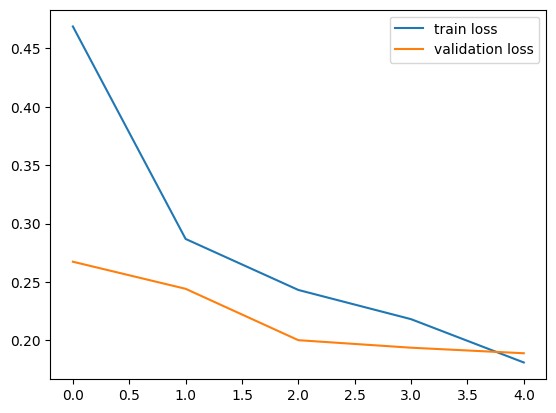

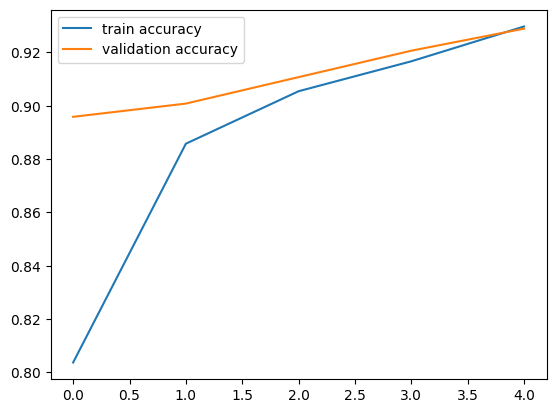

In [44]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/with mask.jpg


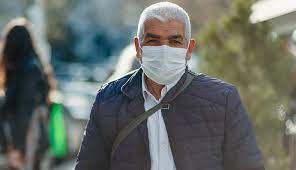

1/1 [==============================] - 0s 35ms/step
[[0.5047812 0.5217072]]
1
The person in the image is wearing a mask


In [49]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/without mask.jpg


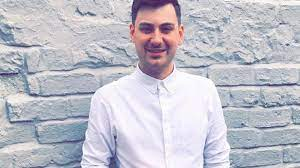

1/1 [==============================] - 0s 33ms/step
[[0.508086   0.48707166]]
0
The person in the image is not wearing a mask


In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')